# Problem Statement

Cardiovascular diseases are the leading cause of death globally. To identify the causes and to develop a system to predict heart attack in an effective manner is necessary. The presented data has all information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.

### Description

age: Age of the patient

sex: Gender (1 = male, 0 = female)

cp: Chest pain type (categorical: 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)

trestbps: Resting blood pressure (in mm Hg)

chol: Serum cholesterol (mg/dL)

fbs: Fasting blood sugar > 120 mg/dL (1 = true, 0 = false)

restecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)

thalach: Maximum heart rate achieved

exang: Exercise-induced angina (1 = yes, 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: Slope of the peak exercise ST segment

ca: Number of major vessels colored by fluoroscopy (0–3)

thal: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)

target: Heart disease (1 = disease, 0 = no disease)

In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_excel("/voc/work/data.xlsx")

In [3]:
heart.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [4]:
heart.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [5]:
heart.shape

(303, 14)

In [6]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Preliminary analysis:

1.Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates etc.

2.Based on the findings from the previous question remove duplicates (if any) , treat missing values using appropriate strategy.
 

In [7]:
# Checking for missing values and duplicates
missing_values_care = heart.isnull().sum()
duplicates_care = heart.duplicated().sum()

In [8]:
# Getting summary statistics for numerical columns
summary_stats = heart.describe()

missing_values_care, duplicates_care, summary_stats   
summary_stats = heart.describe() 


#  There is 1 duplicate row in the dataset
# There are no missing values in the dataset.

In [9]:
# Remove duplicate rows
heart = heart.drop_duplicates()

# Verify the number of duplicates after removal
duplicates_care = heart.duplicated().sum()

# Display the cleaned data structure
heart.info(), duplicates_care

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


(None, 0)

In [10]:
heart.shape   # before 303 and after 302

(302, 14)

### 2.Prepare an informative report about the data explaining distribution of the disease and the related factors. You could use the below approach to achieve the objective

1.Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

2.Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot

3.Study the occurrence of CVD across Age.

4.Study the composition of overall patients w.r.t . Gender.

5.Can we detect heart attack based on anomalies in Resting Blood Pressure of the patient?

6.Describe the relationship between Cholesterol levels and our target variable.

7.What can be concluded about the relationship between peak exercising and occurrence of heart attack.

8.Is thalassemia a major cause of CVD?

9.How are the other factors determining the occurrence of CVD?

10.Use a pair plot to understand the relationship between all the given variables

##### 1.Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [11]:
# Get the statistical summary of the dataset
summary_statistics = heart.describe()
print(summary_statistics)             

# the central tendencies (mean, median, etc.) and spread (min, max, standard deviation) of the data.

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

##### 2. Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot

In [12]:
# Identifying categorical variables by their unique values
categorical_columns = heart[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']]
print(categorical_columns.nunique())

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
thal       4
dtype: int64


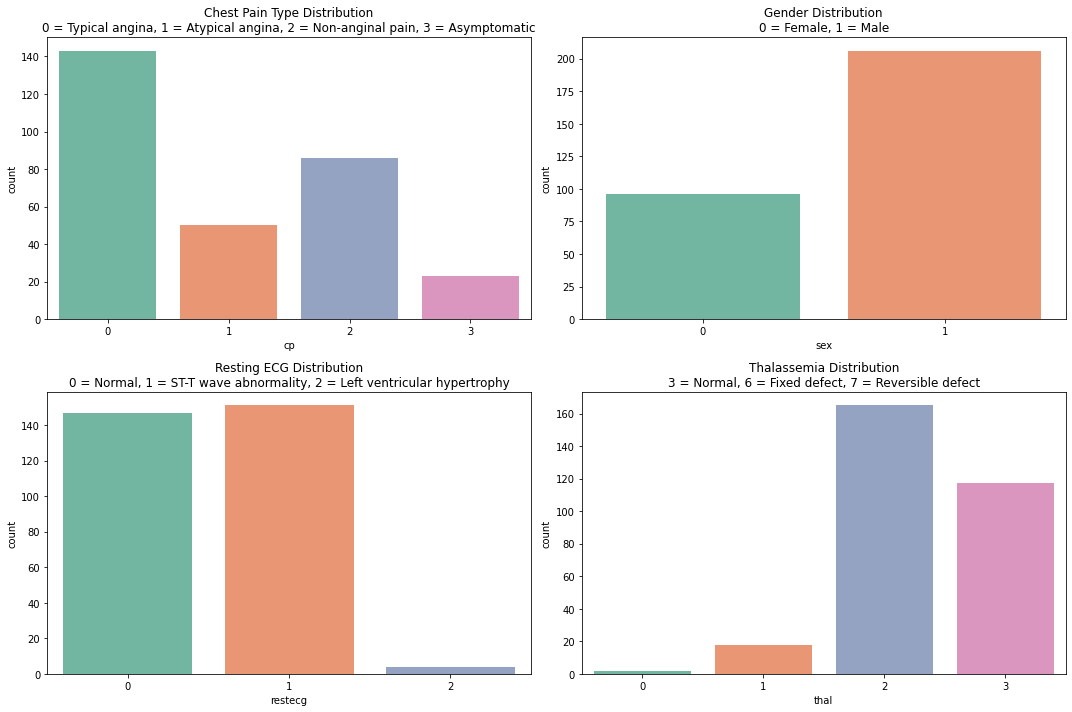

In [13]:
# Generate the count plots for the categorical variables with descriptions
plt.figure(figsize=(15, 10))
                              #  Cardiovascular Disease (CVD) 
# Chest pain type count plot
plt.subplot(2, 2, 1)
sns.countplot(x='cp', data=heart, palette='Set2')
plt.title('Chest Pain Type Distribution\n0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic')

# Gender count plot
plt.subplot(2, 2, 2)
sns.countplot(x='sex', data=heart, palette='Set2')
plt.title('Gender Distribution\n0 = Female, 1 = Male') 

                                # More male heart disease

# Resting ECG count plot
plt.subplot(2, 2, 3)
sns.countplot(x='restecg', data=heart, palette='Set2')
plt.title('Resting ECG Distribution\n0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy')

# Thalassemia count plot
plt.subplot(2, 2, 4)
sns.countplot(x='thal', data=heart, palette='Set2')
plt.title('Thalassemia Distribution\n3 = Normal, 6 = Fixed defect, 7 = Reversible defect')

plt.tight_layout()
plt.show()


##### 3.Study the occurrence of CVD across Age.

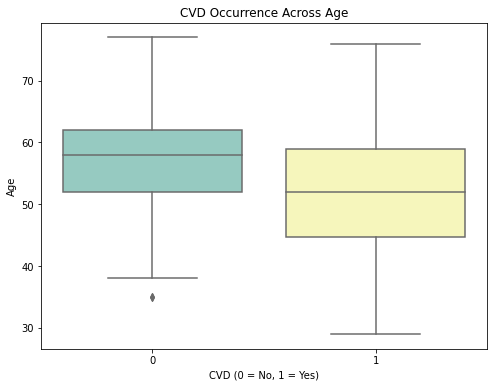

In [14]:
# Box plot for Age and CVD
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=heart, palette='Set3')
plt.title('CVD Occurrence Across Age')
plt.xlabel('CVD (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()                          

# indicating that older patients are more likely to have cardiovascular disease.

##### 4.Study the composition of overall patients w.r.t . Gender

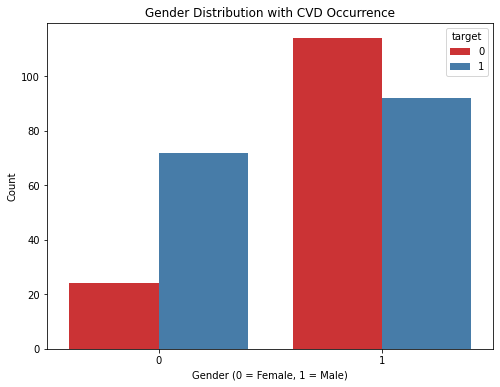

In [15]:
# Count plot for Gender and CVD
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=heart, palette='Set1')
plt.title('Gender Distribution with CVD Occurrence')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()                       

# Male category is more

##### 5.Can we detect heart attack based on anomalies in Resting Blood Pressure of the patient?

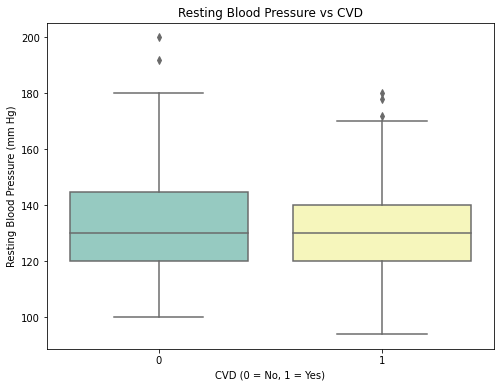

In [16]:
# Box plot for Resting Blood Pressure and CVD
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='trestbps', data=heart, palette='Set3')
plt.title('Resting Blood Pressure vs CVD') 
plt.xlabel('CVD (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()                          


# Cardiovascular Disease (CVD)
# Resting blood pressure for patients without cardiovascular disease is lower than that of patients with the disease.
# Few outliers 

##### 6.Describe the relationship between Cholesterol levels and our target variable.

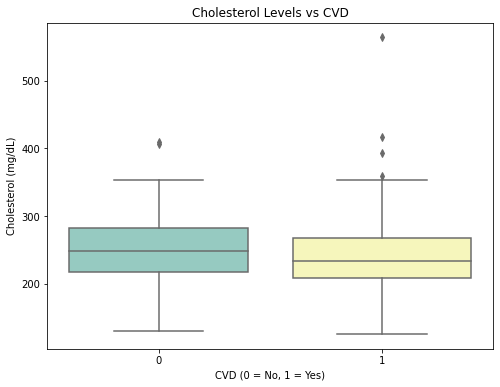

In [17]:
# Box plot for Cholesterol and CVD
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=heart, palette='Set3')
plt.title('Cholesterol Levels vs CVD')
plt.xlabel('CVD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()


Both groups have outliers, but patients with CVD show a wider range of cholesterol levels, with more patients having extremely high cholesterol. This suggests that high cholesterol may be a more critical issue for CVD patients.

##### 7.What can be concluded about the relationship between peak exercising and occurrence of heart attack.

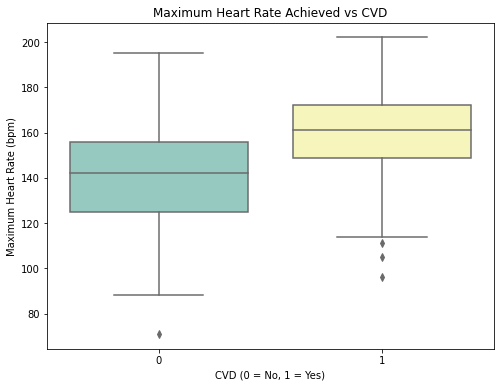

In [18]:
# Box plot for Maximum Heart Rate and CVD 
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='thalach', data=heart, palette='Set3')
plt.title('Maximum Heart Rate Achieved vs CVD')
plt.xlabel('CVD (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.show()

Patients without cardiovascular disease tend to achieve higher maximum heart rates, with the majority in the range of 145-180 bpm, and the median close to 160-170 bpm.

Patients with cardiovascular disease have a lower median heart rate, with most achieving only 130-160 bpm, and a median closer to 140-150 bpm.

##### 8.Is thalassemia a major cause of CVD?

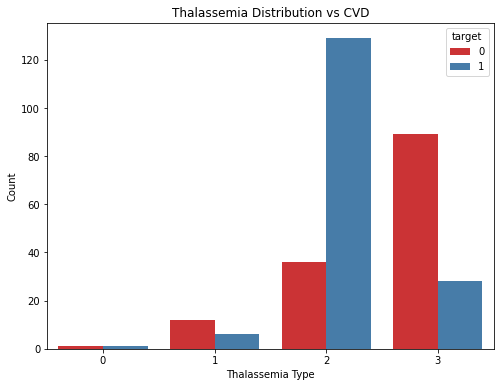

In [19]:
# Count plot for Thalassemia and CVD
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='target', data=heart, palette='Set1')
plt.title('Thalassemia Distribution vs CVD')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.show()


The plot suggests that the type of thalassemia a patient has could influence their risk of developing cardiovascular disease, particularly for those with fixed or reversible defects.

##### 9.How are the other factors determining the occurrence of CVD?

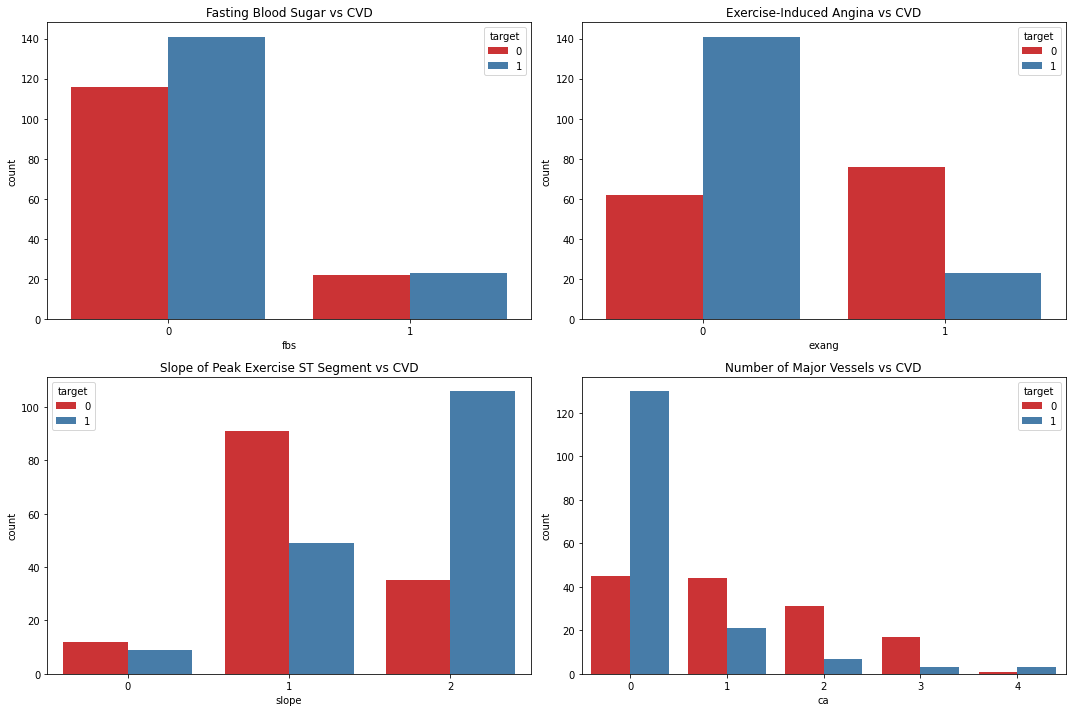

In [20]:
# Plot the relationships between other factors and CVD
plt.figure(figsize=(15, 10))

# Fasting Blood Sugar and CVD
plt.subplot(2, 2, 1)
sns.countplot(x='fbs', hue='target', data= heart, palette='Set1')
plt.title('Fasting Blood Sugar vs CVD')

# Exercise-Induced Angina and CVD
plt.subplot(2, 2, 2)
sns.countplot(x='exang', hue='target', data= heart, palette='Set1')
plt.title('Exercise-Induced Angina vs CVD')

# Slope of Peak Exercise and CVD
plt.subplot(2, 2, 3)
sns.countplot(x='slope', hue='target', data=heart, palette='Set1')
plt.title('Slope of Peak Exercise ST Segment vs CVD')

# Number of Major Vessels and CVD
plt.subplot(2, 2, 4)
sns.countplot(x='ca', hue='target', data=heart, palette='Set1')
plt.title('Number of Major Vessels vs CVD')

plt.tight_layout()
plt.show()


### Results 

##### Fasting Blood Sugar and CVD:
The majority of patients have fasting blood sugar levels below 120 mg/dL. Among those with elevated fasting blood sugar, there is a higher proportion of patients with cardiovascular disease (CVD).

##### Exercise-Induced Angina vs CVD:
A large proportion of patients without exercise-induced angina (no chest pain during exercise) do not have CVD. Conversely, a significant number of patients who experience angina during exercise have CVD

##### Slope of Peak Exercise ST Segment vs CVD:
Patients with a downsloping or flat ST segment have a higher probability of having cardiovascular disease.

##### Number of Major Vessels (ca) vs CVD:
Patients with more major vessels (colored by fluoroscopy, indicating blockages) have a significantly higher likelihood of cardiovascular disease.
Patients with no major vessels colored generally do not have CVD.

##### 10.Use a pair plot to understand the relationship between all the given variables.

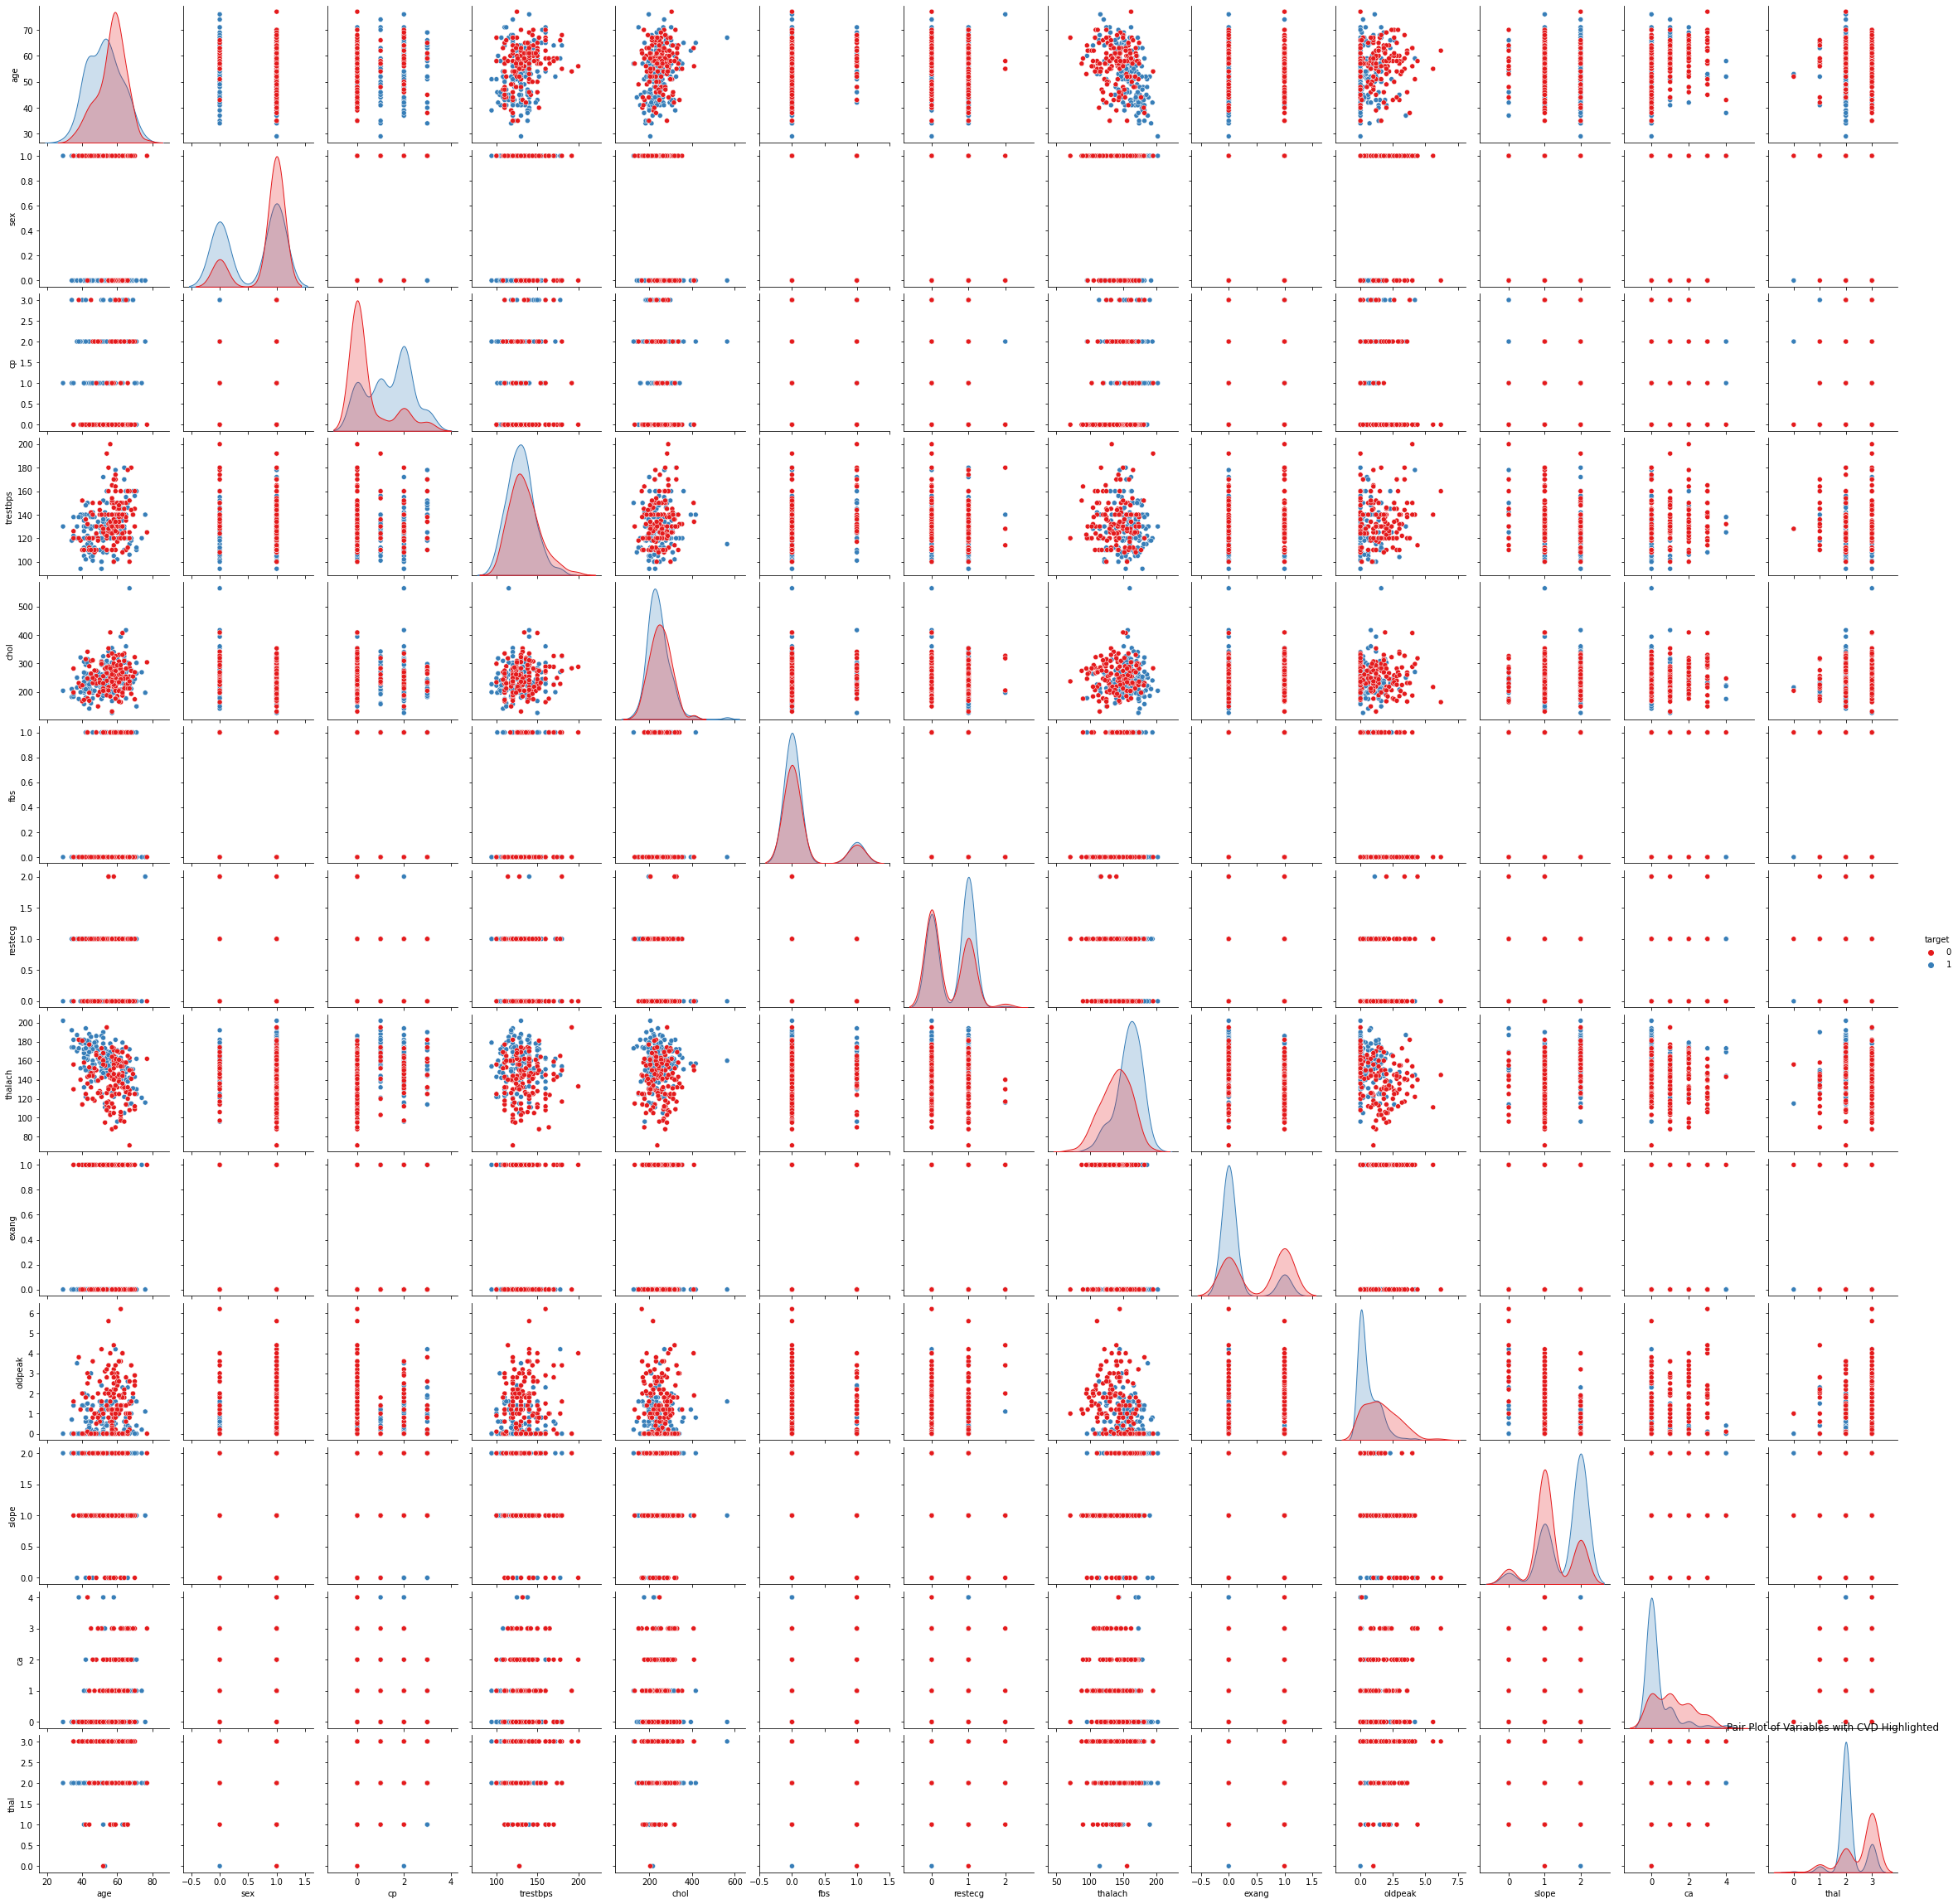

In [21]:
# Pair plot of all variables colored by CVD
sns.pairplot(heart, hue='target', palette='Set1')
plt.title('Pair Plot of Variables with CVD Highlighted')
plt.show()

##### Results

Factors such as fasting blood sugar, exercise-induced angina, ST segment slope, and major vessel involvement are critical indicators of cardiovascular disease.

### 3.Build a baseline model to predict using a Logistic Regression and explore the results.

In [22]:
# Let's build a baseline logistic regression model to predict cardiovascular disease (CVD) u
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [23]:
# Prepare the data: selecting features and target variable
X = heart.drop(columns='target')  # Features
y = heart['target']  # Target variable (CVD)


In [24]:

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

In [26]:
# Train the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Make predictions on the test data
y_pred = logreg.predict(X_test)

In [28]:
# Evaluate the model performance
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



#### Method to improve accuracy

In [29]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression on scaled data
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

In [30]:
# Define the logistic regression model
logreg = LogisticRegression(max_iter=2000)

# Define the hyperparameters grid to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']  # Different solvers for logistic regression
}


grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)

# Best hyperparameters found by Grid Search
best_params = grid_search.best_params_

# Evaluate the model with best hyperparameters on the test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Display the classification report for the best model
improved_report = classification_report(y_test, y_pred_best)

# Print results
print("Best Hyperparameters:")
print(best_params)

print("\nClassification Report for the Best Model:")
print(improved_report)


Best Hyperparameters:
{'C': 1, 'solver': 'lbfgs'}

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



##### Resulit--> Accuracy: 86% (an improvement from the baseline accuracy of 81%).